In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
import pandas as pd

# Load Titanic dataset (train data)
df = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')

# Preview the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Fill missing 'Age' values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop rows with missing 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)


/tmp/ipykernel_19/3892861835.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [5]:
# Convert 'Sex' column into numeric values (0 for female, 1 for male)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Convert 'Embarked' into numeric values
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


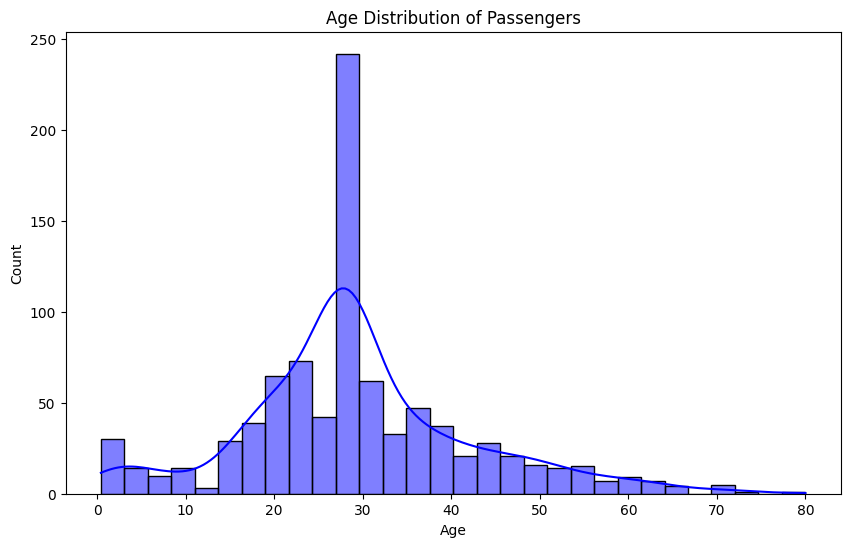

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, color='blue', bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


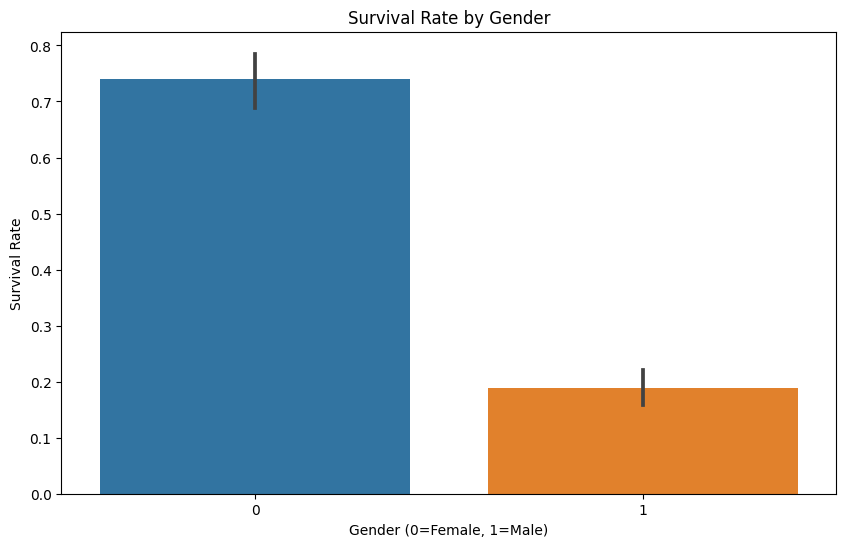

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Sex', y='Survived', estimator='mean')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Survival Rate')
plt.show()


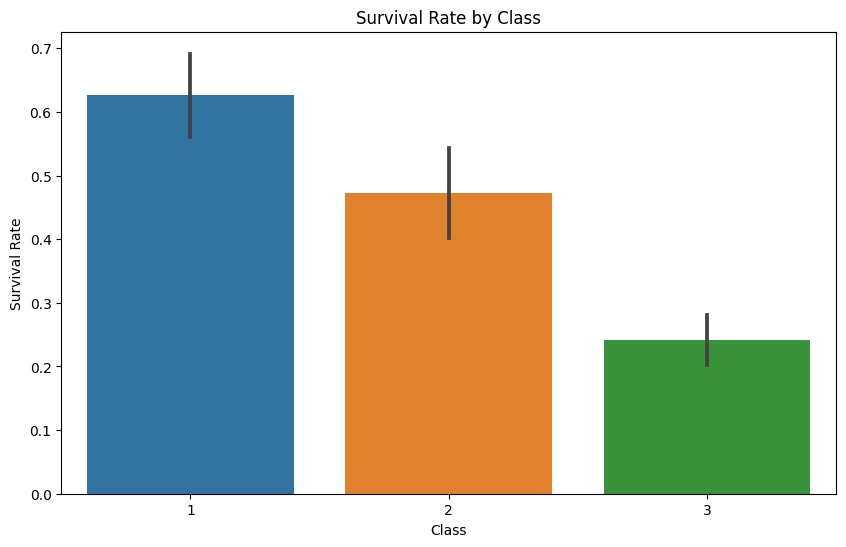

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Pclass', y='Survived', estimator='mean')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()


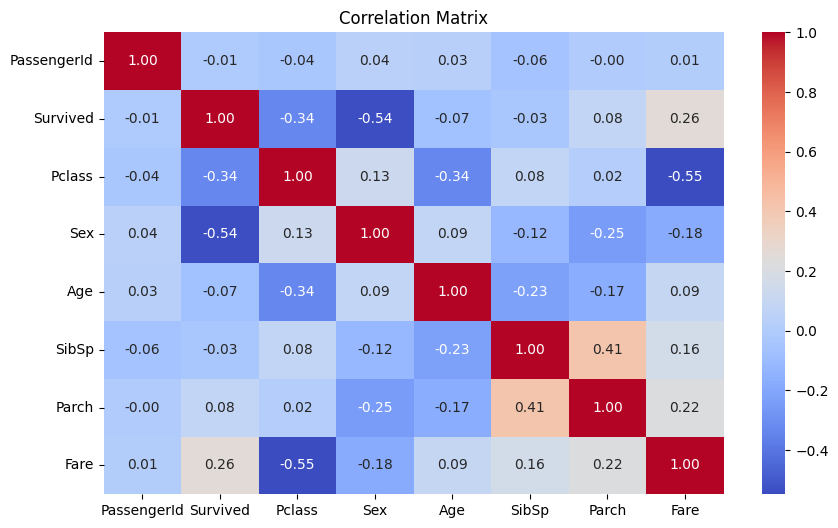

In [9]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Accuracy: 0.79


In [11]:
# Create a new feature 'Family_Size'
df['Family_Size'] = df['SibSp'] + df['Parch']

# Inspect the new feature
df[['SibSp', 'Parch', 'Family_Size']].head()


,SibSp,Parch,Family_Size
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale 'Age' and 'Fare' columns
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Verify scaling
df[['Age', 'Fare']].head()


,Age,Fare
0,-0.563674,-0.500240
1,0.669217,0.788947
2,-0.255451,-0.486650
3,0.438050,0.422861
4,0.438050,-0.484133


In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validation score
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean():.2f}')


Cross-validation scores: [0.70786517 0.80337079 0.85393258 0.82022472 0.85310734]
Mean CV score: 0.81


In [14]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'max_depth': 10, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.74      0.72      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



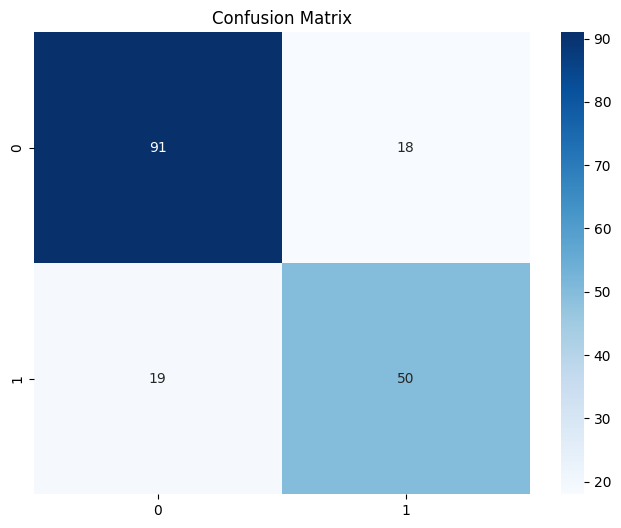

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()


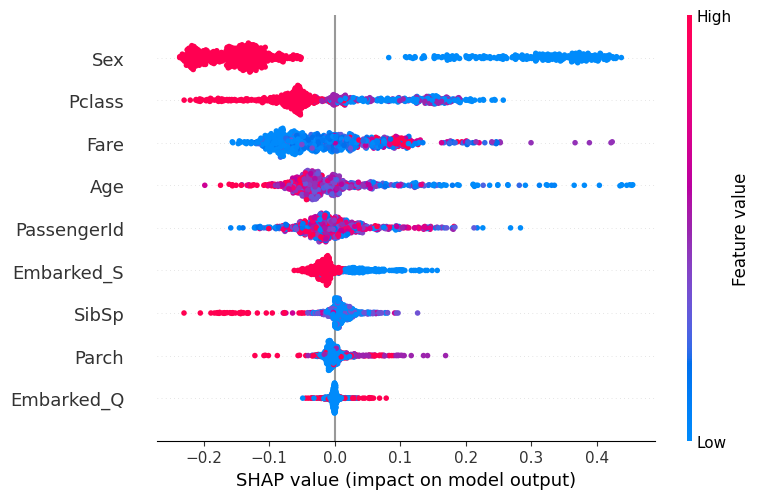

In [16]:
import shap

# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary
shap.summary_plot(shap_values[1], X_train)


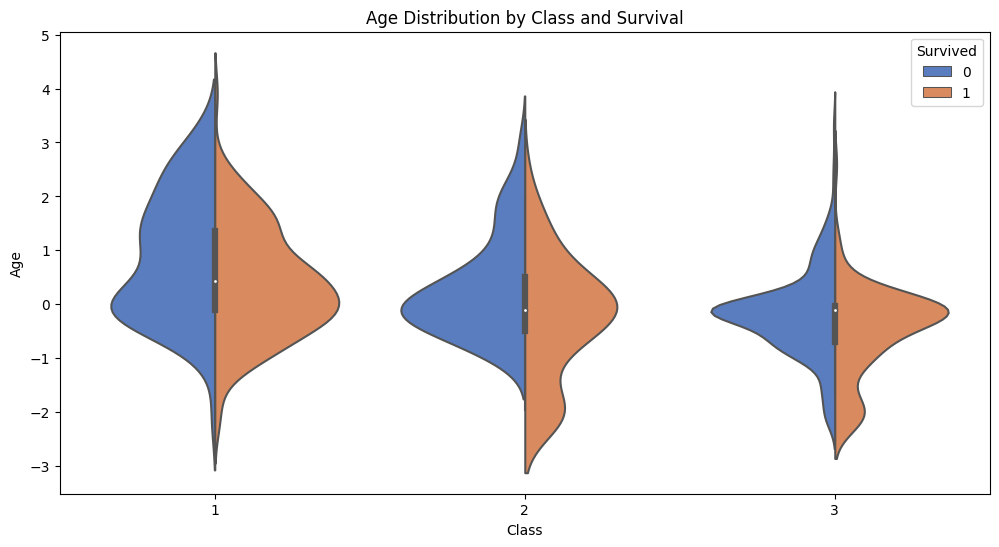

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True, palette='muted')
plt.title('Age Distribution by Class and Survival')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a lengt

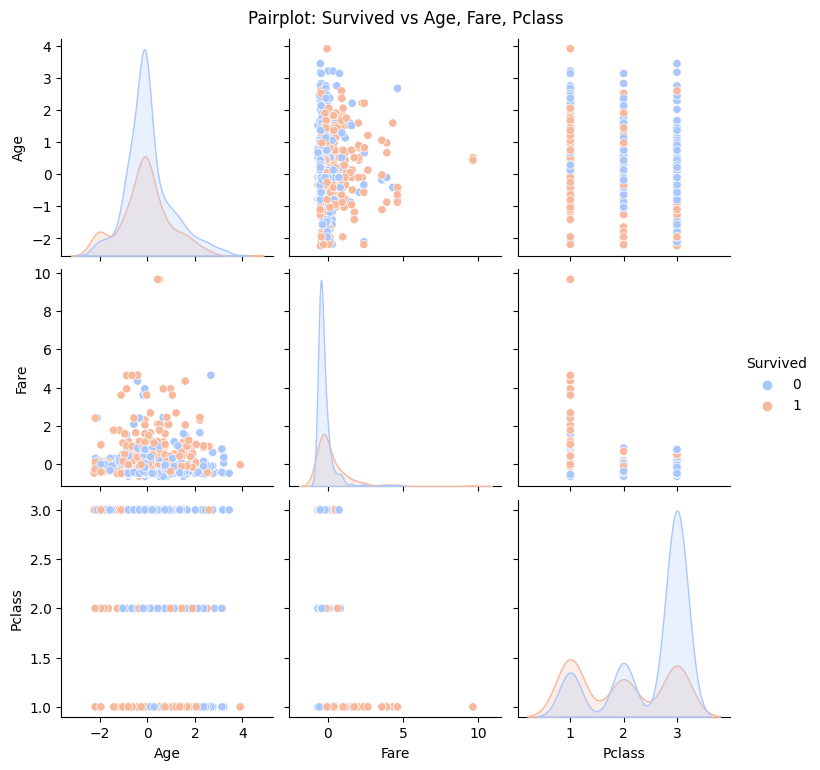

In [18]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot: Survived vs Age, Fare, Pclass', y=1.02)
plt.show()


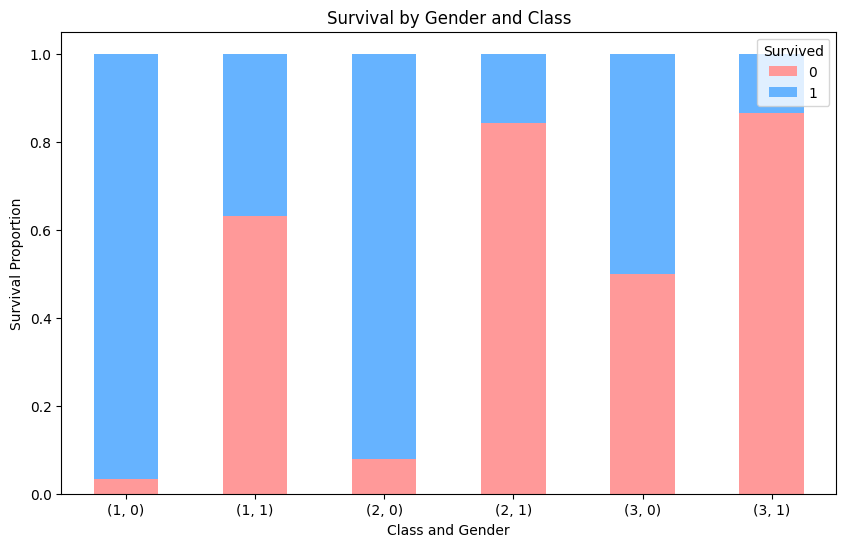

In [19]:
# Create a pivot table for survival rates by class and gender
survival_by_class_gender = df.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Plot a stacked bar plot
survival_by_class_gender.plot(kind='bar', stacked=True, figsize=(10,6), color=['#ff9999', '#66b3ff'])
plt.title('Survival by Gender and Class')
plt.xlabel('Class and Gender')
plt.ylabel('Survival Proportion')
plt.xticks(rotation=0)
plt.show()


The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


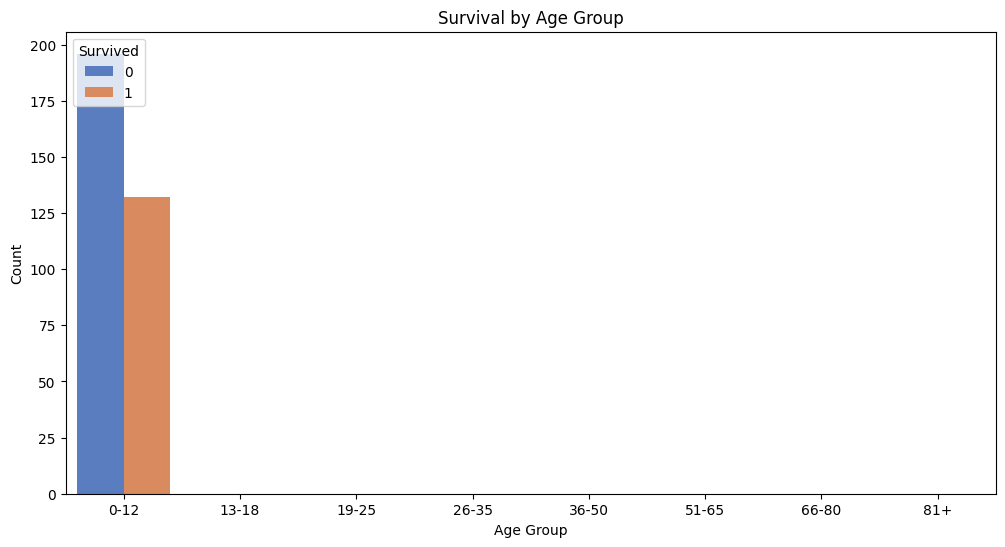

In [20]:
# Create age bins
age_bins = [0, 12, 18, 25, 35, 50, 65, 80, 100]
age_labels = ['0-12', '13-18', '19-25', '26-35', '36-50', '51-65', '66-80', '81+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Countplot for survival by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AgeGroup', hue='Survived', palette='muted')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


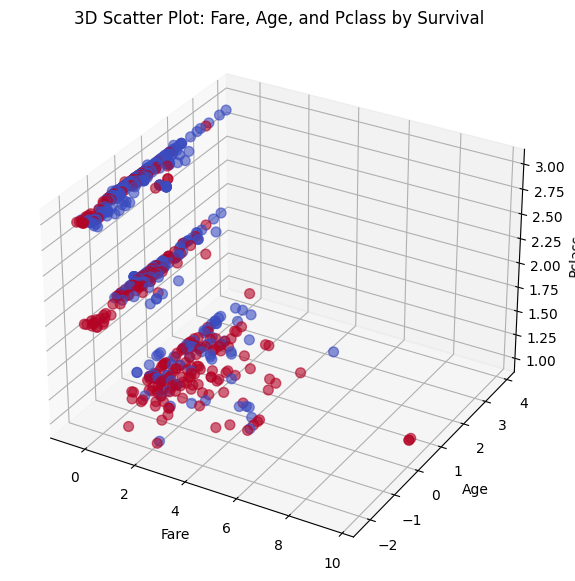

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Fare'], df['Age'], df['Pclass'], c=df['Survived'], cmap='coolwarm', s=50, alpha=0.6)

# Labels and title
ax.set_xlabel('Fare')
ax.set_ylabel('Age')
ax.set_zlabel('Pclass')
ax.set_title('3D Scatter Plot: Fare, Age, and Pclass by Survival')

plt.show()


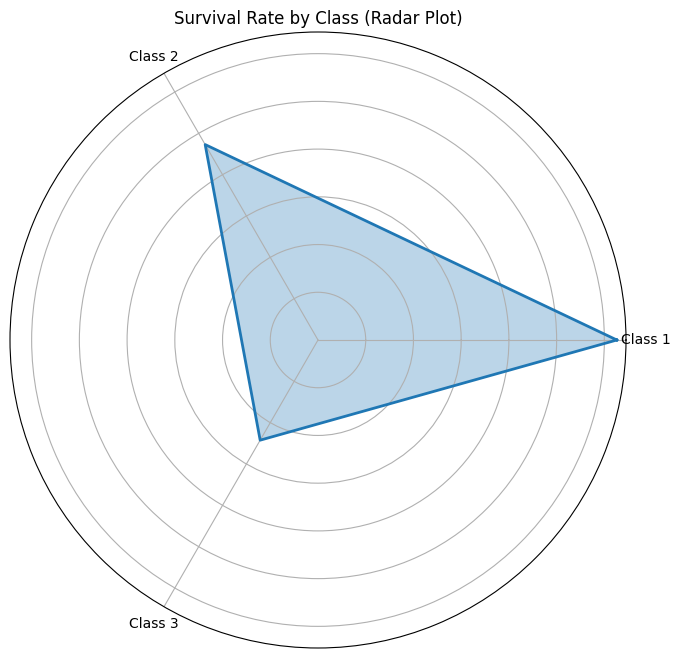

In [22]:
import numpy as np

# Calculate survival rates for each class
survival_rates = df.groupby('Pclass')['Survived'].mean()

# Prepare data for Radar chart
categories = ['Class 1', 'Class 2', 'Class 3']
values = survival_rates.values

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repeat the first value to close the circle
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Survival Rate')
ax.fill(angles, values, alpha=0.3)
ax.set_yticklabels([])  # Hide y-axis labels

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Survival Rate by Class (Radar Plot)')
plt.show()
